In [19]:
## 2D normal distribution with given mean and variance
import numpy as np
import matplotlib.pyplot as plt

In [30]:
Mu1 = np.array([-2,0])
Mu2 = np.array([0,2])
Mu3 = np.array([0,-2])
CovM1 = np.array([[0.25,0], [0,0.25]])
CovM2 = np.array([[0.25,0], [0,0.25]])
CovM3 = np.array([[0.25,0], [0,0.25]])
Z1 = np.repeat(Mu1[:,np.newaxis], 100, axis=1).transpose()
Z2 = np.repeat(Mu2[:,np.newaxis], 100, axis=1).transpose()
Z3 = np.repeat(Mu3[:,np.newaxis], 100, axis=1).transpose()
Z1 = Z1 + np.random.randn(100,2) @ np.linalg.cholesky(CovM1).T
Z2 = Z2 + np.random.randn(100,2) @ np.linalg.cholesky(CovM2).T
Z3 = Z3 + np.random.randn(100,2) @ np.linalg.cholesky(CovM3).T

In [4]:
Z1.shape

(100, 2)

In [ ]:
## Caculate the discriminate function
from numpy.linalg import inv,det
from sympy import symbols
from sympy import Matrix
import sympy
u, v = symbols('u v')
x = Matrix([u, v])

In [45]:
W1 = -0.5*inv(CovM1)
w1 = inv(CovM1) @ Mu1
w10 = -0.5 * Mu1.T @ inv(CovM1) @ Mu1 - \
        -0.5 * np.log(det(CovM1)) + np.log(0.5)
g1 = x.T * Matrix(W1) * x + Matrix(w1[:,np.newaxis].T) * x + Matrix([w10])

In [60]:
g1

Matrix([[-2.0*u**2 - 8.0*u - 2.0*v**2 - 10.0794415416798]])

In [46]:
W2 = -0.5*inv(CovM2)
w2 = inv(CovM2) @ Mu2
w20 = -0.5 * Mu2.T @ inv(CovM2) @ Mu2 - \
        -0.5 * np.log(det(CovM2)) + np.log(0.5)
g2 = x.T * Matrix(W2) * x + Matrix(w2[:,np.newaxis].T) * x + Matrix([w20])
g2

Matrix([[-2.0*u**2 - 2.0*v**2 + 8.0*v - 10.0794415416798]])

In [47]:
W3 = -0.5*inv(CovM3)
w3 = inv(CovM3) @ Mu3
w30 = -0.5 * Mu3.T @ inv(CovM3) @ Mu3 - \
        -0.5 * np.log(det(CovM3)) + np.log(0.5)
g3 = x.T * Matrix(W3) * x + Matrix(w3[:,np.newaxis].T) * x + Matrix([w30])
g3

Matrix([[-2.0*u**2 - 2.0*v**2 - 8.0*v - 10.0794415416798]])

In [53]:
g_bound1 = g2 - g1
g_bound2 = g3 - g1
g_bound3 = g3 - g2

In [49]:
g_bound1

Matrix([[8.0*u + 8.0*v]])

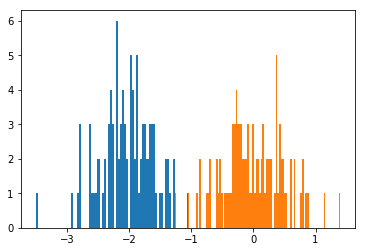

In [21]:
n, bins1, _ = plt.hist(Z1[:,0], 100)
n, bins2, _ = plt.hist(Z1[:,1], 100)
x1, y1 = np.meshgrid(bins1, bins2)

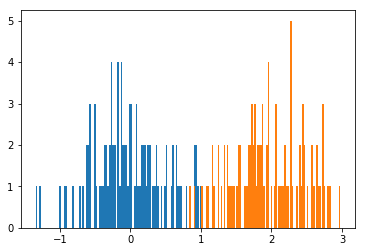

In [22]:
n, bins1, _ = plt.hist(Z2[:,0], 100)
n, bins2, _ = plt.hist(Z2[:,1], 100)
x2, y2 = np.meshgrid(bins1, bins2)

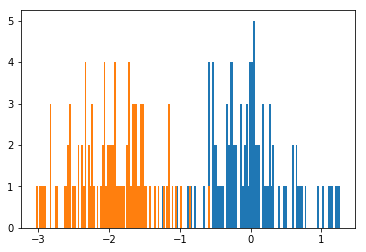

In [23]:
n, bins1, _ = plt.hist(Z3[:,0], 100)
n, bins2, _ = plt.hist(Z3[:,1], 100)
x3, y3 = np.meshgrid(bins1, bins2)

In [24]:
def gausspdf(x, mu, sigma):
    d = len(x)
    det = np.linalg.det(sigma)
    A = (2 * np.pi)**(d/2) * np.sqrt(det) # scalar
    B = (x-mu) @ np.linalg.inv(sigma) @ (x-mu)
    p = 1 / A * np.exp(- B / 2)
    return p
    

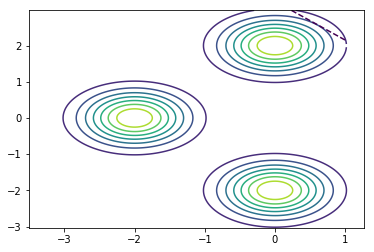

In [50]:
z1 = np.zeros_like(x1)
z2 = np.zeros_like(x2)
z3 = np.zeros_like(x3)
z_bound = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(y1.shape[0]):
        z1[i,j] = gausspdf([x1[i,j], y1[i,j]], Mu1, CovM1)
        z2[i,j] = gausspdf([x2[i,j], y2[i,j]], Mu2, CovM2)
        z3[i,j] = gausspdf([x3[i,j], y3[i,j]], Mu3, CovM3)
        z_bound[i,j] = g_bound1.subs([(u, x1[i,j]), (v, y1[i,j])])[0,0]
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(x2,y2,z_bound,[0],linestyles="dashed")
plt.show()

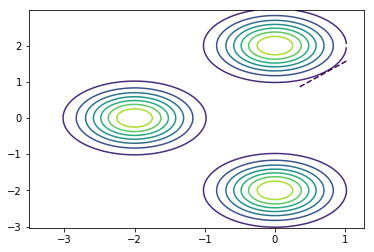

In [51]:
for i in range(x1.shape[0]):
    for j in range(y1.shape[0]):
        z_bound[i,j] = g_bound2.subs([(u, x1[i,j]), (v, y1[i,j])])[0,0]
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(x2,y2,z_bound,[0],linestyles="dashed")
plt.show()

In [54]:
z_bound1 = np.zeros_like(bx)

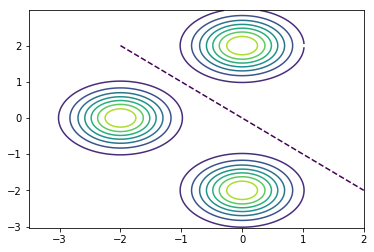

In [56]:
xx = np.linspace(-3, 2, 20)
yy = np.linspace(-3, 2, 20)
bx, by = np.meshgrid(xx,yy)
for i in range(bx.shape[0]):
    for j in range(by.shape[0]):
        z_bound1[i,j] = g_bound1.subs([(u, bx[i,j]), (v, by[i,j])])[0,0]
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(bx,by,z_bound1,[0],linestyles="dashed")
plt.show()

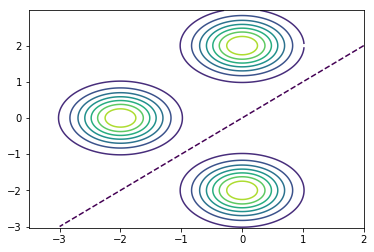

In [57]:
z_bound2 = np.zeros_like(bx)
for i in range(bx.shape[0]):
    for j in range(by.shape[0]):
        z_bound2[i,j] = g_bound2.subs([(u, bx[i,j]), (v, by[i,j])])[0,0]
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(bx,by,z_bound2,[0],linestyles="dashed")
plt.show()

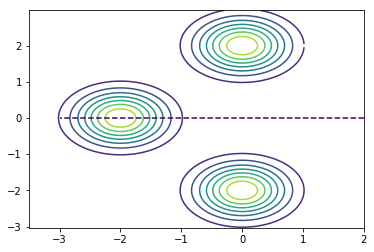

In [58]:
z_bound3 = np.zeros_like(bx)
for i in range(bx.shape[0]):
    for j in range(by.shape[0]):
        z_bound3[i,j] = g_bound3.subs([(u, bx[i,j]), (v, by[i,j])])[0,0]
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(bx,by,z_bound3,[0],linestyles="dashed")
plt.show()

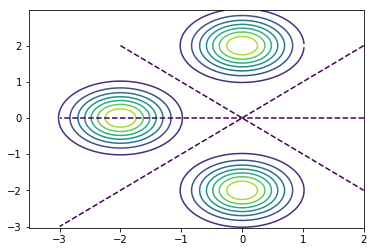

In [59]:
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(bx,by,z_bound1,[0],linestyles="dashed")
plt.contour(bx,by,z_bound2,[0],linestyles="dashed")
plt.contour(bx,by,z_bound3,[0],linestyles="dashed")
plt.show()

In [61]:
g_bound1

Matrix([[8.0*u + 8.0*v]])

In [62]:
g_bound2

Matrix([[8.0*u - 8.0*v]])

In [63]:
g_bound3

Matrix([[-16.0*v]])

In [72]:
nn = len(Z1[:,0])
nMu1 = np.sum(Z1, axis=0) / nn
nMu1

array([-1.90610474, -0.02709181])

In [77]:
tt = np.array([[0,0],[0,0]])
for i in range(len(Z1)):
    tt = tt + np.outer(Z1[i]-nMu1, Z1[i]-nMu1) / nn
tt.shape

(2, 2)

In [82]:
nn = len(Z2[:,0])
nMu2 = np.sum(Z2, axis=0) / nn
nMu2
tt2 = np.array([[0,0],[0,0]])
for i in range(len(Z2)):
    tt2 = tt2 + np.outer(Z2[i]-nMu2, Z2[i]-nMu2) / nn
tt2

array([[0.24875774, 0.03155827],
       [0.03155827, 0.3333563 ]])

In [83]:
nn = len(Z3[:,0])
nMu3 = np.sum(Z3, axis=0) / nn
nMu3
tt3 = np.array([[0,0],[0,0]])
for i in range(len(Z3)):
    tt3 = tt3 + np.outer(Z3[i]-nMu3, Z3[i]-nMu3) / nn
tt3

array([[0.20564183, 0.01058592],
       [0.01058592, 0.25161024]])

In [70]:
Z1[:,0].shape

(100,)

In [75]:
len(Z1)

100

In [65]:
Z1[:,1].sum() / len(Z1[:,1])

-0.02709181163510999

In [66]:
Z2[:,0].sum() / len(Z2[:,0]), Z2[:,1].sum() / len(Z2[:,1])

(0.040981338688154116, 1.9745013046721198)

In [67]:
Z3[:,0].sum() / len(Z3[:,0]), Z3[:,1].sum() / len(Z3[:,1])

(-0.031596510744801215, -1.987561439426728)

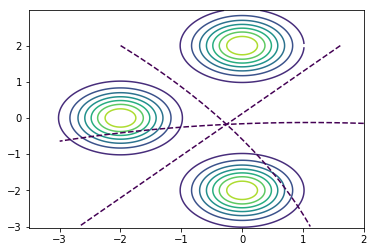

In [87]:
tt1 = tt
W1 = -0.5*inv(tt1)
w1 = inv(tt1) @ nMu1
w10 = -0.5 * nMu1.T @ inv(tt1) @ nMu1 - \
        -0.5 * np.log(det(tt1)) + np.log(0.5)
g1 = x.T * Matrix(W1) * x + Matrix(w1[:,np.newaxis].T) * x + Matrix([w10])
W2 = -0.5*inv(tt2)
w2 = inv(tt2) @ nMu2
w20 = -0.5 * nMu2.T @ inv(tt2) @ nMu2 - \
        -0.5 * np.log(det(tt2)) + np.log(0.5)
g2 = x.T * Matrix(W2) * x + Matrix(w2[:,np.newaxis].T) * x + Matrix([w20])
g2
W3 = -0.5*inv(tt3)
w3 = inv(tt3) @ nMu3
w30 = -0.5 * nMu3.T @ inv(tt3) @ nMu3 - \
        -0.5 * np.log(det(tt3)) + np.log(0.5)
g3 = x.T * Matrix(W3) * x + Matrix(w3[:,np.newaxis].T) * x + Matrix([w30])
g3
g_bound1 = g2 - g1
g_bound2 = g3 - g1
g_bound3 = g3 - g2
xx = np.linspace(-3, 2, 20)
yy = np.linspace(-3, 2, 20)
bx, by = np.meshgrid(xx,yy)
ez_bound1 = np.zeros_like(bx)
ez_bound2 = np.zeros_like(bx)
ez_bound3 = np.zeros_like(bx)
for i in range(bx.shape[0]):
    for j in range(by.shape[0]):
        ez_bound1[i,j] = g_bound1.subs([(u, bx[i,j]), (v, by[i,j])])[0,0]
        ez_bound2[i,j] = g_bound2.subs([(u, bx[i,j]), (v, by[i,j])])[0,0]
        ez_bound3[i,j] = g_bound3.subs([(u, bx[i,j]), (v, by[i,j])])[0,0]
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(bx,by,ez_bound1,[0],linestyles="dashed")
plt.contour(bx,by,ez_bound2,[0],linestyles="dashed")
plt.contour(bx,by,ez_bound3,[0],linestyles="dashed")
plt.show()


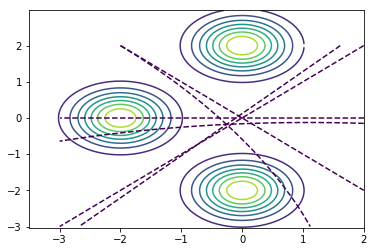

In [88]:
plt.contour(x1,y1,z1)
plt.contour(x2,y2,z2)
plt.contour(x3,y3,z3)
plt.contour(bx,by,ez_bound1,[0],linestyles="dashed")
plt.contour(bx,by,ez_bound2,[0],linestyles="dashed")
plt.contour(bx,by,ez_bound3,[0],linestyles="dashed")
plt.contour(bx,by,z_bound1,[0],linestyles="dashed")
plt.contour(bx,by,z_bound2,[0],linestyles="dashed")
plt.contour(bx,by,z_bound3,[0],linestyles="dashed")
plt.show()